In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# assign dataset file path to the variable 'path'

path=r"C:\Users\19452\Desktop\Seema\Careerfoundry-Data Analytics Course\Work Area\Python Fundamentals\Nov-2023 Instacart Basket Analysis"

# import dataset from prepared data folder

ords_prods_merge=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_merge.pkl'))

### Bar chart

<Axes: xlabel='orders_day_of_week'>

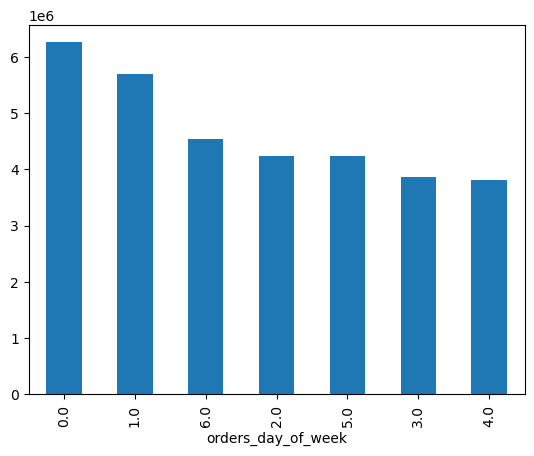

In [3]:
# create a bar chart showing frequency of 'orders_day_of_week' column
# by default the observations are ordered from largest to smallest.

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

In [4]:
# print frequency table

ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0.0    6252941
1.0    5696724
6.0    4530304
2.0    4243173
5.0    4236989
3.0    3868747
4.0    3812390
Name: count, dtype: int64

<Axes: xlabel='orders_day_of_week'>

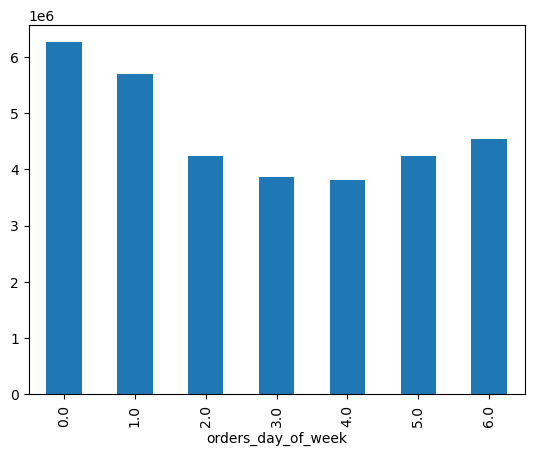

In [5]:
# The sort_index() function will sort the bars in your chart according to their index order 
# (rather than largest to smallest).

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [6]:
# the same ordering by index values technique can be used while printing frequency table with 
# the help of sort_index() function

ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0.0    6252941
1.0    5696724
2.0    4243173
3.0    3868747
4.0    3812390
5.0    4236989
6.0    4530304
Name: count, dtype: int64

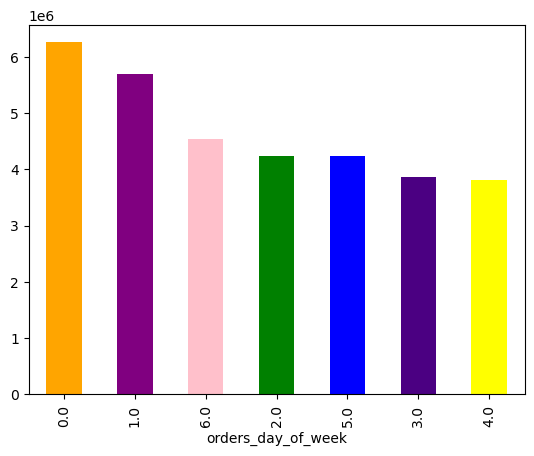

In [7]:
# change bar colors to make them distinct by adding a color argument in your plot.bar() function
# and listing the colors you want in order
# save the chart in 'bar' object so that it can be accessed at any time by calling bar.figure

bar=ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color=['orange','purple','pink','green','blue','indigo','yellow'])

In [8]:
# export 'bar' object outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function

bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_orders_dow.png'))

### Histogram

<Axes: ylabel='Frequency'>

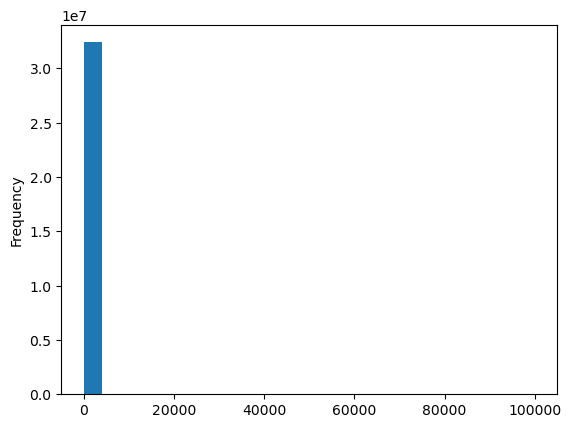

In [9]:
# create a histogram of the “prices” column

ords_prods_merge['prices'].plot.hist(bins=25)

In [10]:
# describe() function gives you a quick list of descriptive statistics for a column
# notice that max value appears to be an outlier

ords_prods_merge['prices'].describe()

count    3.240487e+07
mean     1.198022e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

### check for specific statistics to get each value

In [11]:
# mean

ords_prods_merge['prices'].mean()

11.980224398369758

In [12]:
# median

ords_prods_merge['prices'].median()

7.4

In [13]:
# max

ords_prods_merge['prices'].max()

99999.0

### While the mean and median are between 7 and 12 (relatively realistic), the max value yields a strange result, 99,999
### which is forcing your histogram to shove all the small values into one bar and the extreme value in another one. 
### And this second bar is so tiny that you can’t even see it on the chart. Hence, the one-column histogram you saw above.

### As you learned in Achievement 2, another way to explore your data is to create a scatterplot. 
### Normally, you’d use scatterplots to investigate the relationship between two variables. 
### However, when conducting an exploratory analysis, you can also use scatterplots to visualize 
### the distribution of data points in order to identify any outliers.

### Scatterplot

C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

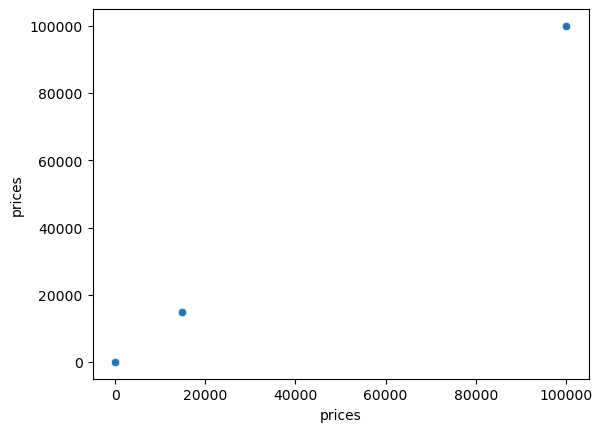

In [14]:
# create a scatterplot with prices in both the axes since we are trying to look at the outliers in price column

sns.scatterplot(x='prices',y='prices',data=ords_prods_merge)

In [15]:
# to check the outlier, see if there are any values above a certain threshold in your data, 
# for instance, anything above the “normal” price of a supermarket item.
# If you imagined the maximum price anyone would pay in a supermarket were around $100, 
# then anything above that amount could be considered an outlier.

df=ords_prods_merge.loc[ords_prods_merge['prices']>100]


In [16]:
df['prices'].head(6000)

10236554    14900.0
10236555    14900.0
10236556    14900.0
10236557    14900.0
10236558    14900.0
             ...   
29400377    99999.0
29400378    99999.0
29400379    99999.0
29400380    99999.0
29400381    99999.0
Name: prices, Length: 5127, dtype: float64

In [17]:
# There are 5127 observations with prices>100 which are considered outliers. For now, let’s mark the outliers 
# as missing since they don’t make sense in terms of the other values in the column. 
# To turn them into NaNs, use the following code

ords_prods_merge.loc[ords_prods_merge['prices']>100,'prices']=np.nan

### check if values above 100 have been replaced with nan

In [18]:
# look for the max price.  Before replacing prices>100 with nan max value used to be 99999.0

ords_prods_merge['prices'].max()

25.0

In [19]:
# Look values greater than 100

ords_prods_merge.loc[ords_prods_merge['prices']>100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,merge_flag,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,average spent,spending flag,regularity,order frequency flag


<Axes: ylabel='Frequency'>

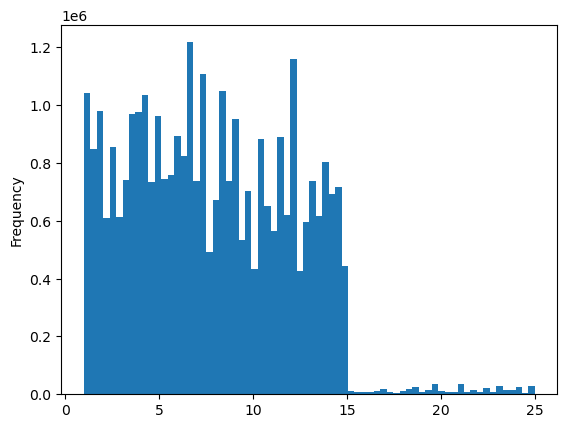

In [20]:
# create a histogram of the “prices” column after the outliers have been handled
# Increasing the number of bins will allow you to see more variety in your histogram.

ords_prods_merge['prices'].plot.hist(bins=70)

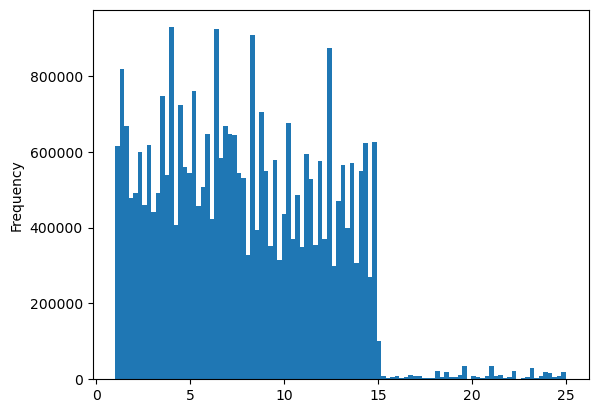

In [21]:
# assign the histogram to an object 'hist' 

hist=ords_prods_merge['prices'].plot.hist(bins=100)

In [22]:
# export the histogram object to '04 Analysis' folder

hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_orders_dow.png'))

### Line Charts

In [23]:
# “seed” represents a random but reproducible pattern—Python will always give you the same set of random numbers 
# (in this case, seed “4”) rather than creating a new pattern of numbers every time you run the command.

np.random.seed(4)

In [24]:
# create a new list called dev. This will be what stores your boolean values—you’ll be getting an output 
# of True or False for every value based on whether it’s less than or equal to 0.7
# np.random.rand() function being used as your argument is what will actually create your list of 
# random floating numbers between 0 and 1. 
# The np at the beginning stands for the NumPy library, the random in the middle is a function that creates 
# random numbers, and the rand at the end is a function that ensures the random numbers generated by random 
# follow the uniform distribution. 
# Uniform distribution simply means that there should be an equal chance for every number between 0 and 1 to occur
# in the distribution.
# Within the brackets of this function, you’ll see len(ords_prods_merge). This len() produces a value that represents 
# the length of whatever you put inside it. By passing your dataframe, you’ll receive an output of 32,404,859, 
# which is how many rows are in your dataframe. 

dev=np.random.rand(len(ords_prods_merge))<=0.7

In [25]:
# check what is in dev

dev

array([False,  True, False, ...,  True,  True,  True])

In [1]:
# see what happend when the function is used with a number as argument

np.random.rand(4)

NameError: name 'np' is not defined

In [28]:
# Since the list 'dev' contains 32,404,859 random numbers, store 70% of the smaple in dataframe big

big=ords_prods_merge[dev]

In [35]:
#check the number of rows and columns in 'big'

big.shape

(22849753, 23)

In [31]:
# store 30% of the smaple in dataframe small 

small=ords_prods_merge[~dev]

In [34]:
#check the number of rows and columns in 'small'

small.shape

(9791526, 23)

In [39]:
# check the number of rows in ords_prods_merge dataframe

len(ords_prods_merge)

32641279

In [38]:
# number of rows in the lists 'big' and 'small' together should be equal to 'len(ords_prods_merge)'

len(big)+len(small)

32641279

In [40]:
# To improve the speed, reducing your samples to only those columns necessary for the chart

df_2=small[['orders_day_of_week','prices']]

C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

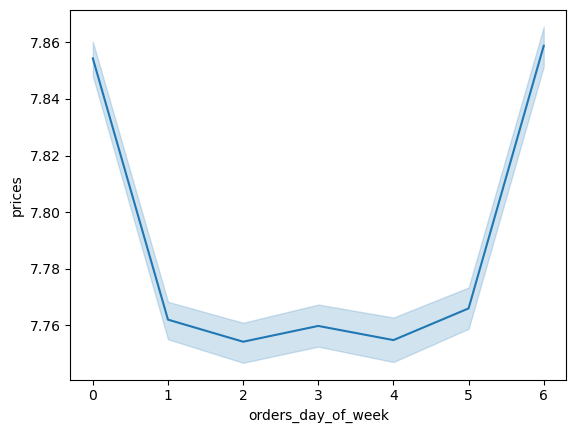

In [41]:
# Create a line chart

line=sns.lineplot(data=df_2,x='orders_day_of_week',y='prices')

In [42]:
line

<Axes: xlabel='orders_day_of_week', ylabel='prices'>